In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [2]:
with open('paper_data.json', 'r') as f:
    paper_data = json.load(f)

df = pd.DataFrame.from_dict(paper_data, orient='index')

In [3]:
display(df)

,title,publication year,authors,abstract,keywords,metrics,link,article_number,references,citations
3244082,Session details: Queue management,2003,"[{'id': '81100360141', 'name': 'Dina Katabi'}]",No abstract available.,"[{'type': 'Index Terms', 'kwd': []}]","{'citationCount': 0, 'totalDownloads': 19}",https://dl.acm.org/doi/10.1145/3244082,3244082,[],[]
.863986,The effects of active queue management on web ...,2003,"[{'id': '81100276127', 'name': 'Long Le'}, {'i...",We present an empirical study of the effects o...,"[{'type': 'Index Terms', 'kwd': ['Networks', '...","{'citationCount': 54, 'totalDownloads': 1085}",https://dl.acm.org/doi/10.1145/863955.863986,.863986,"[{'citation': 'S. Athuraliya, A Note on Parame...","[{'citation': 'Su X, Zhang D, Li W and Wang X...."
.863987,Design of a robust active queue management alg...,2003,"[{'id': '81100315981', 'name': 'Zhang Heying'}...",Active Queue Management (AQM) is a very active...,"[{'type': 'Index Terms', 'kwd': ['Networks', '...","{'citationCount': 23, 'totalDownloads': 537}",https://dl.acm.org/doi/10.1145/863955.863987,.863987,"[{'citation': 'B. Braden, D. Clark, J. Crowcro...",[{'citation': 'Hendrawan and Hernandia P. ...
.863988,Persistent dropping: an efficient control of t...,2003,"[{'id': '81100086465', 'name': 'Hani Jamjoom'}...",Flash crowd events (FCEs) present a real threa...,"[{'type': 'Index Terms', 'kwd': ['Computing me...","{'citationCount': 29, 'totalDownloads': 824}",https://dl.acm.org/doi/10.1145/863955.863988,.863988,"[{'citation': 'H. Balakrishnan, V. N. Padmanab...",[{'citation': ' (2018). Flash Cro...
3244078,Session details: Measurement,2003,"[{'id': '81100090331', 'name': 'Srinivasan Ses...",No abstract available.,"[{'type': 'Index Terms', 'kwd': []}]","{'citationCount': 0, 'totalDownloads': 18}",https://dl.acm.org/doi/10.1145/3244078,3244078,[],[]
...,...,...,...,...,...,...,...,...,...,...
.347557,Measuring link bandwidths using a deterministi...,2000,"[{'id': '81537663556', 'name': 'Kevin Lai'}, {...",We describe a deterministic model of packet de...,"[{'type': 'Index Terms', 'kwd': ['Computer sys...","{'citationCount': 265, 'totalDownloads': 1759}",https://dl.acm.org/doi/10.1145/347059.347557,.347557,[{'citation': '1.S. M. Bellovin. A Best-Case N...,"[{'citation': 'Li H, Yang C, Wang L, Ansari N,..."
.347560,Practical network support for IP traceback,2000,"[{'id': '81100570405', 'name': 'Stefan Savage'...",This paper describes a technique for tracing a...,"[{'type': 'Index Terms', 'kwd': ['Computer sys...","{'citationCount': 662, 'totalDownloads': 4509}",https://dl.acm.org/doi/10.1145/347059.347560,.347560,[{'citation': '1.F. Baker. Requirements for IP...,[{'citation': 'Kulandaivel M and Arulanand N. ...
.347561,When the CRC and TCP checksum disagree,2000,"[{'id': '81332529871', 'name': 'Jonathan Stone...",Traces of Internet packets from the past two y...,"[{'type': 'Index Terms', 'kwd': ['Computer sys...","{'citationCount': 89, 'totalDownloads': 4595}",https://dl.acm.org/doi/10.1145/347059.347561,.347561,[{'citation': '1.R. Blahut. Theory and Practic...,[{'citation': 'Shannigrahi S and Partridge C. ...
.347563,Packet types: abstract specification of networ...,2000,"[{'id': '81100223402', 'name': 'Peter J. McCan...","In writing networking code, one is often faced...","[{'type': 'Index Terms', 'kwd': ['Computer sys...","{'citationCount': 71, 'totalDownloads': 1342}",https://dl.acm.org/doi/10.1145/347059.347563,.347563,[{'citation': '1.Mark B. Abbott and Larry L. P...,"[{'citation': 'Chen Z, Lafont A, O'Connor L, K..."


In [3]:
# Examine the number of publications each year
df['publication year'] = df['publication year'].astype(int)
publications_per_year = df['publication year'].value_counts().sort_index()

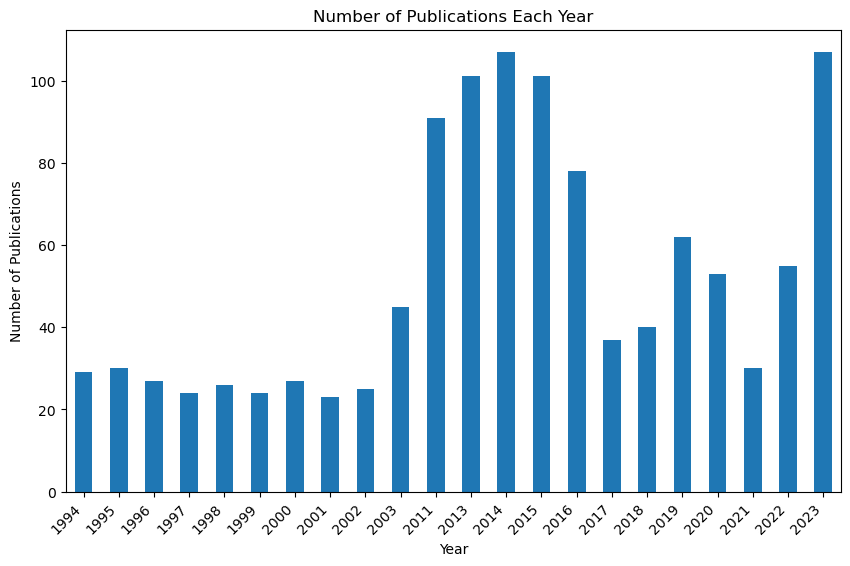

In [4]:
# Plot the number of publications per year
plt.figure(figsize=(10, 6))
publications_per_year.plot(kind='bar')
plt.title('Number of Publications Each Year')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

In [17]:
# Examine the "citationCount" and "totalDownloads"
df['citationCount'] = df['metrics'].apply(lambda x: x.get('citationCount', 0))
df['totalDownloads'] = df['metrics'].apply(lambda x: x.get('totalDownloads', 0))

# Find the top 20 papers by citationCount and totalDownloads
top_20_cited = df.nlargest(20, 'citationCount')
top_20_downloaded = df.nlargest(20, 'totalDownloads')

pd.set_option('display.max_colwidth', None)

print("Top 20 Papers by Citation Count:")
print(top_20_cited[['title']])

print("\nTop 20 Papers by Total Downloads:")
print(top_20_downloaded[['title']])

Top 20 Papers by Citation Count:
                                                                                                    title
.383071                           Chord: A scalable peer-to-peer lookup service for internet applications
.383072                                                            A scalable content-addressable network
.190336          Highly dynamic Destination-Sequenced Distance-Vector routing (DSDV) for mobile computers
.316229                                               On power-law relationships of the Internet topology
2486019                                      B4: experience with a globally-deployed software defined wan
2486033                                                                                Full duplex radios
.190334                                                 MACAW: a media access protocol for wireless LAN's
.285291                              Modeling TCP throughput: a simple model and its empirical validation
.633045      

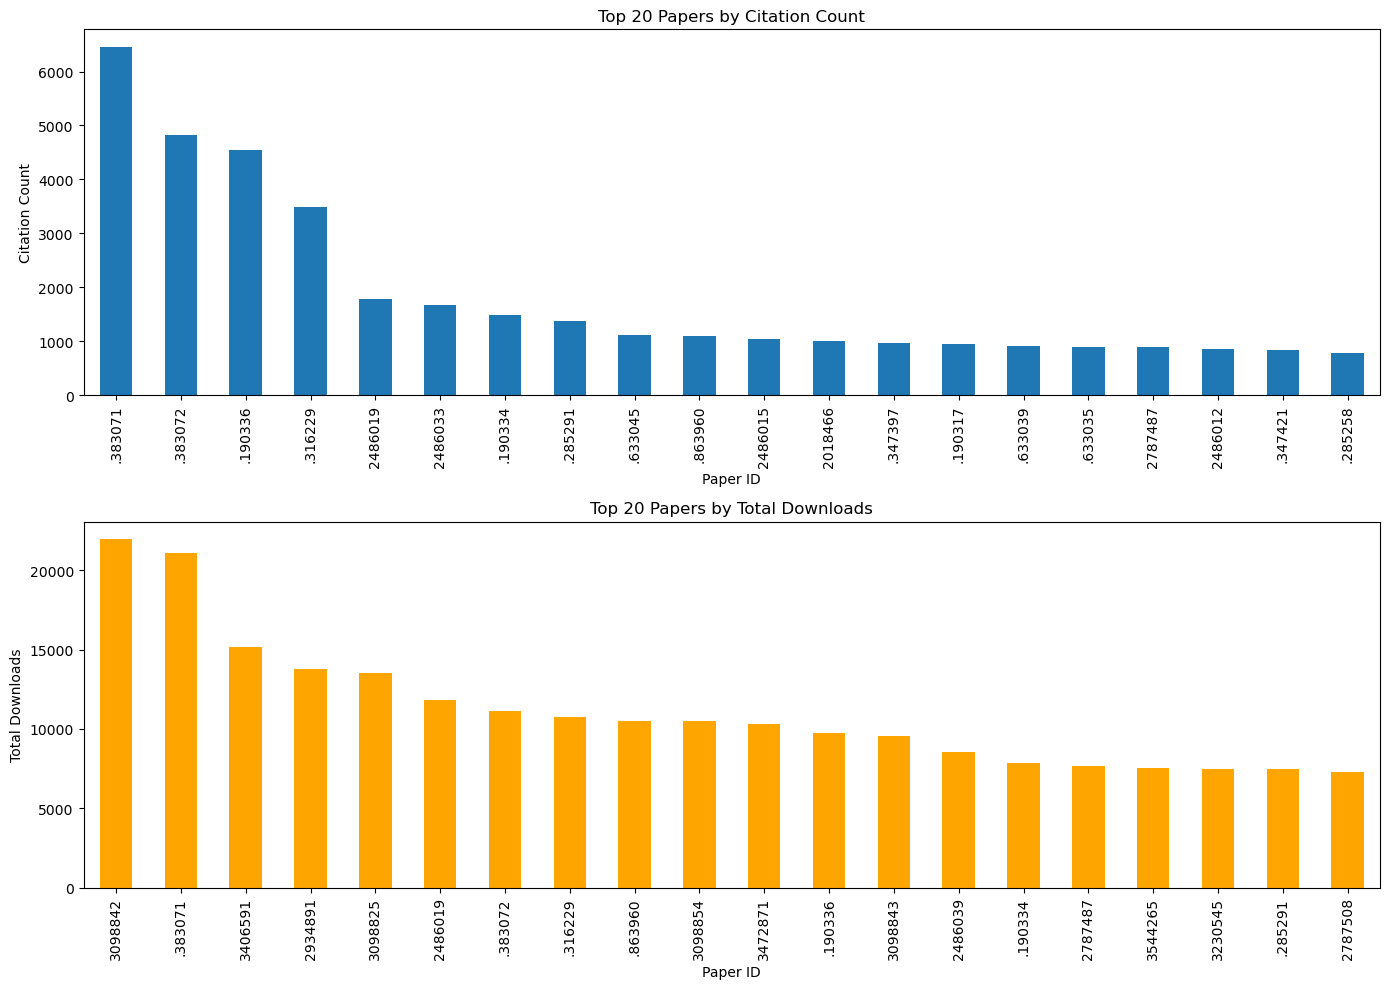

In [18]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
top_20_cited['citationCount'].plot(kind='bar')
plt.title('Top 20 Papers by Citation Count')
plt.xlabel('Paper ID')
plt.ylabel('Citation Count')
plt.xticks(ticks=range(20), labels=top_20_cited.index, rotation=90)

plt.subplot(2, 1, 2)
top_20_downloaded['totalDownloads'].plot(kind='bar', color='orange')
plt.title('Top 20 Papers by Total Downloads')
plt.xlabel('Paper ID')
plt.ylabel('Total Downloads')
plt.xticks(ticks=range(20), labels=top_20_downloaded.index, rotation=90)

plt.tight_layout()
plt.show()

In [21]:
# Identify the keywords of those research papers
cited_keywords = top_20_cited['keywords'].explode().apply(lambda x: x['kwd']).explode().dropna()
downloaded_keywords = top_20_downloaded['keywords'].explode().apply(lambda x: x['kwd']).explode().dropna()

# Generate word clouds for keywords
wordcloud_cited = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cited_keywords))
wordcloud_downloaded = WordCloud(width=800, height=400, background_color='white').generate(' '.join(downloaded_keywords))

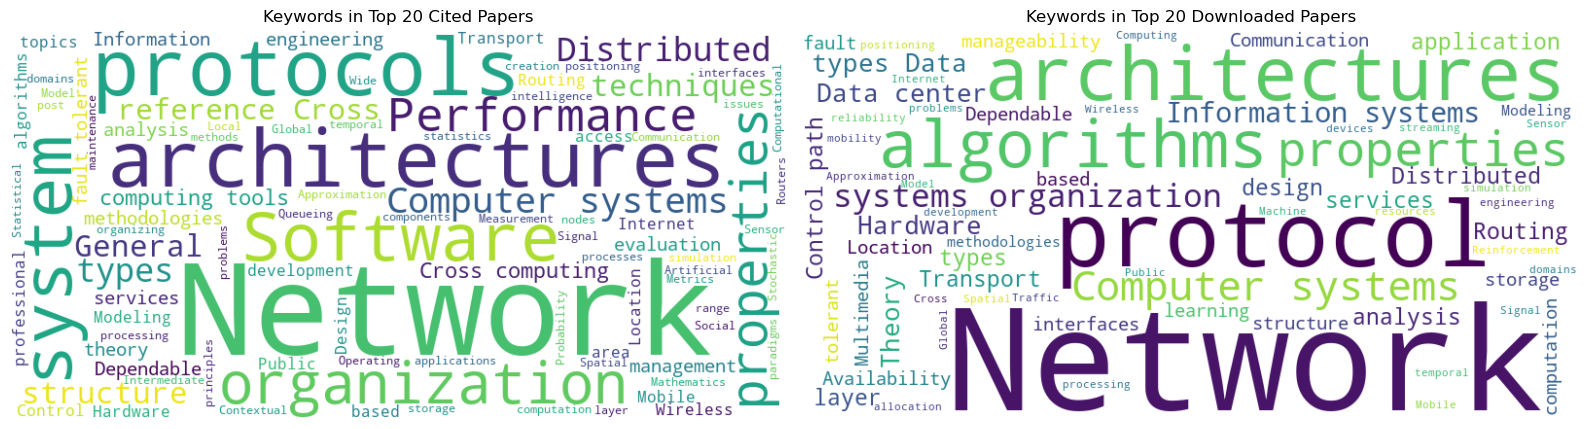

In [22]:
# Plot word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_cited, interpolation='bilinear')
plt.title('Keywords in Top 20 Cited Papers')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_downloaded, interpolation='bilinear')
plt.title('Keywords in Top 20 Downloaded Papers')
plt.axis('off')

plt.tight_layout()
plt.show()

In [24]:
# Count keyword frequencies
cited_keyword_counts = Counter(cited_keywords)
downloaded_keyword_counts = Counter(downloaded_keywords)

cited_keyword_df = pd.DataFrame(cited_keyword_counts.items(), columns=['keyword', 'count']).sort_values(by='count', ascending=False)
downloaded_keyword_df = pd.DataFrame(downloaded_keyword_counts.items(), columns=['keyword', 'count']).sort_values(by='count', ascending=False)

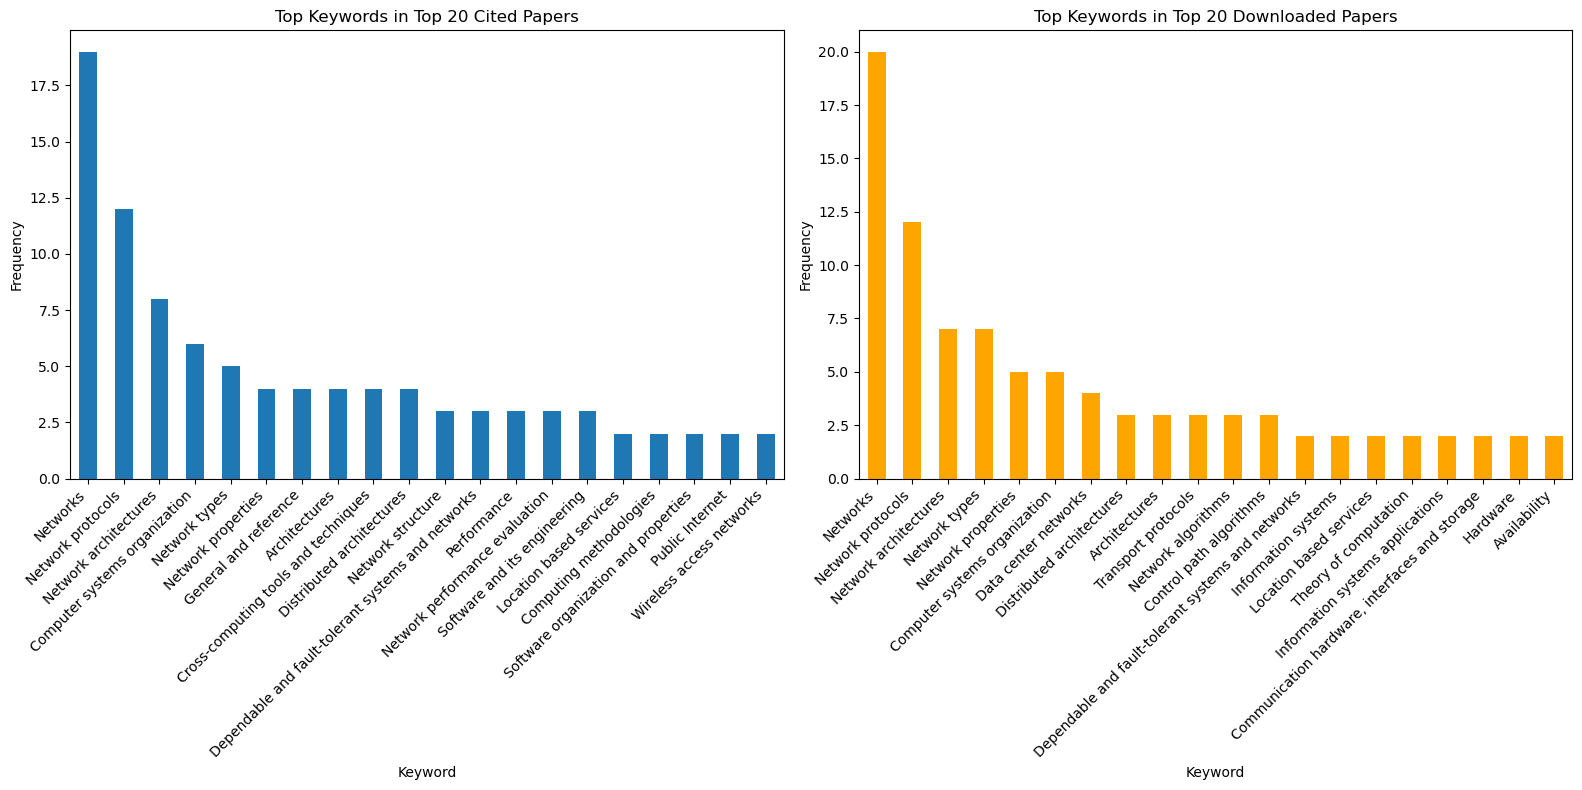

In [25]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
cited_keyword_df.head(20).plot(kind='bar', x='keyword', y='count', legend=False, ax=plt.gca())
plt.title('Top Keywords in Top 20 Cited Papers')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
downloaded_keyword_df.head(20).plot(kind='bar', x='keyword', y='count', legend=False, color='orange', ax=plt.gca())
plt.title('Top Keywords in Top 20 Downloaded Papers')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

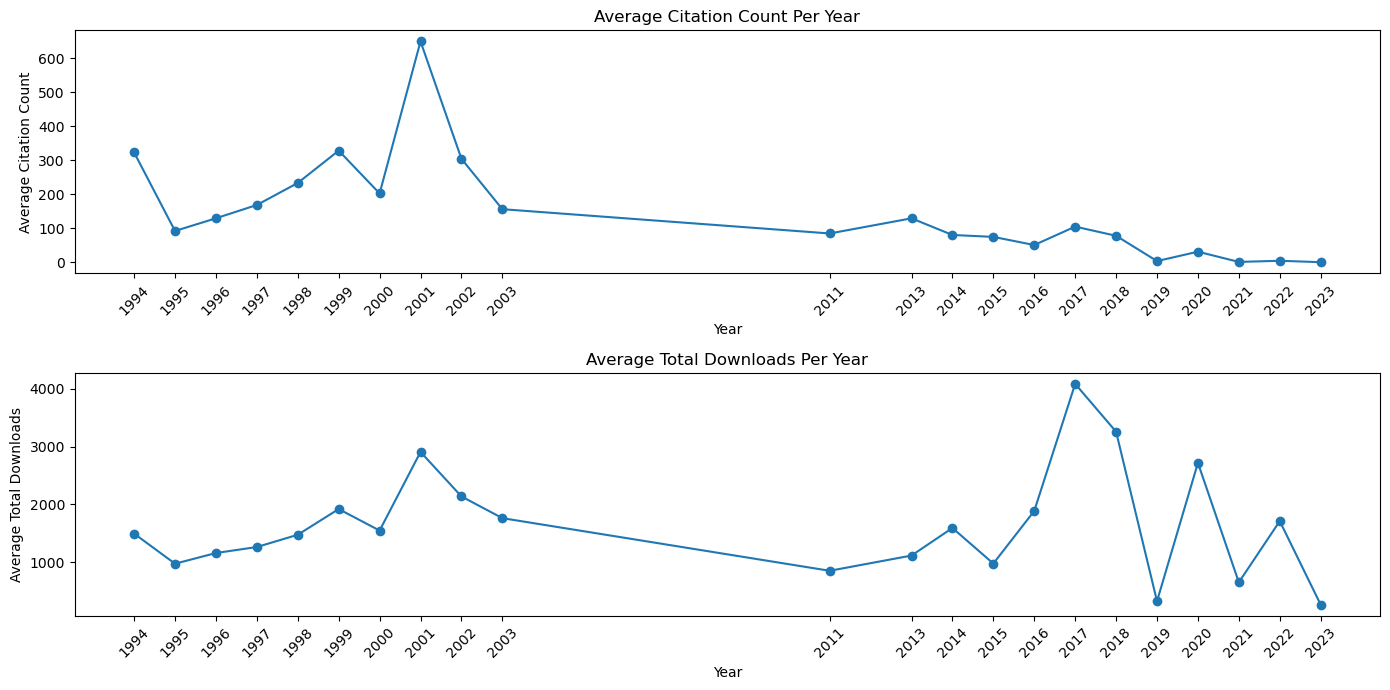

In [29]:
# Examine the quality of the paper over the years
# Group by publication year and calculate mean citationCount and totalDownloads per year
quality_per_year = df.groupby('publication year')[['citationCount', 'totalDownloads']].mean()

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
quality_per_year['citationCount'].plot(kind='line', marker='o')
plt.title('Average Citation Count Per Year')
plt.xlabel('Year')
plt.ylabel('Average Citation Count')
plt.xticks(ticks=quality_per_year.index, labels=quality_per_year.index, rotation=45)

plt.subplot(2, 1, 2)
quality_per_year['totalDownloads'].plot(kind='line', marker='o')
plt.title('Average Total Downloads Per Year')
plt.xlabel('Year')
plt.ylabel('Average Total Downloads')
plt.xticks(ticks=quality_per_year.index, labels=quality_per_year.index, rotation=45)

plt.tight_layout()
plt.show()